# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---


# Necessary Imports

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from P4_helping_fns import *

#the following were added for interactive display
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

#%matplotlib qt
%matplotlib inline

C:\Users\Ayham\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Part_1: Camera Calibration & Distortion Correction


## _A. Matching Points of Interest_

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

## _B. Camera Calibrationa & Correcting for Distortion_

Related Functions in **_helping_fns.py_**: 
- cal_undistort(img, objpoints, imgpoints)


I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.  Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.  

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function.  I applied this distortion correction to the test image using the `cv2.undistort()` function and obtained the following results: 

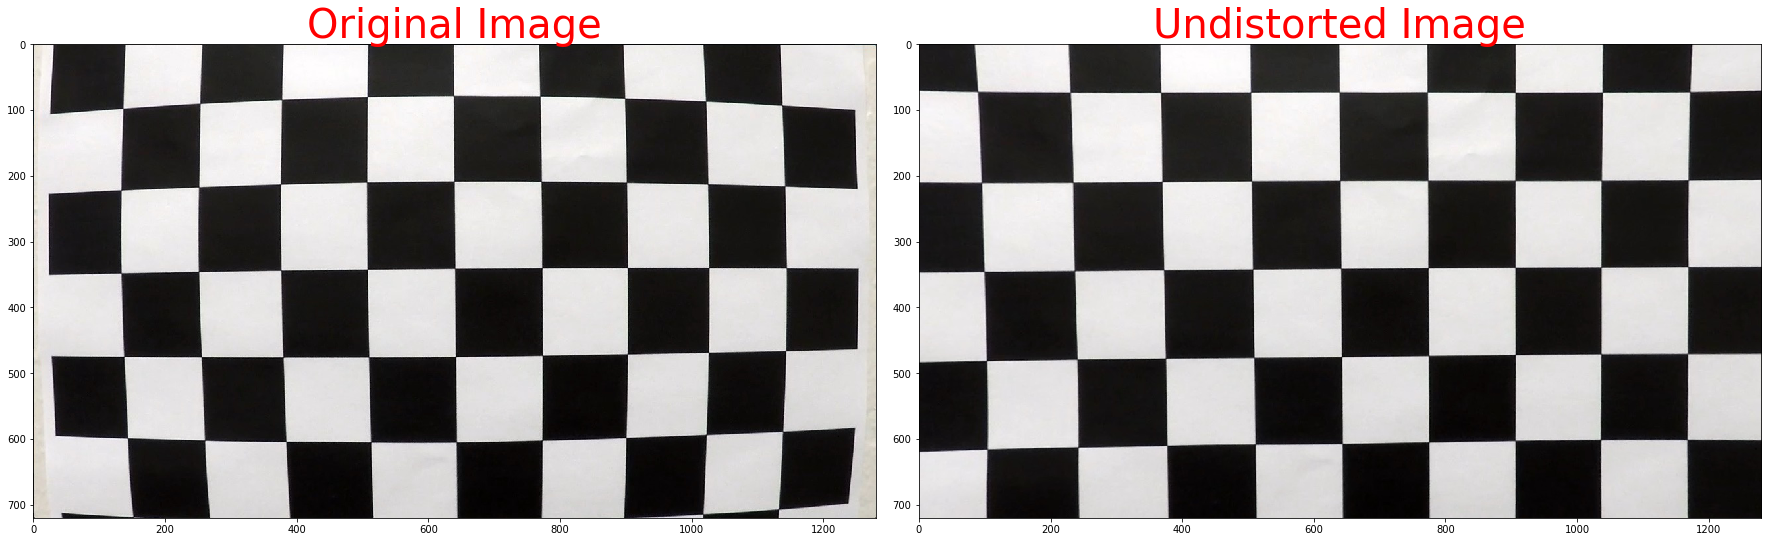

In [3]:
img = mpimg.imread('./camera_cal/calibration1.jpg')

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40, color ='r')
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=40, color ='r')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('0_Undistorted_Camera.png')

-------

# Part_2: Pipeline (Single Images)

**contains the following outline:**
- **A. Example of a distortion-corrected image**
- **B. Creating a Binary Image**
     - B.1: Defining Related Functions
     - B.2: Examinning different image combinations
     - B.3: Examining different edges and gradients using various thresholds
     - B.4: Examining the Effect of Sobel Edge Detection
     - B.5: Summary & Combining Results
- **C. Applying Perspective Transform**
- **D. Identifying Lane Lines **
- **E. Radius of Carvature and Position of Veihicle**
- **F. Putting Everything togehter: Drwaing**

## _A. Example of a distortion-corrected image _

To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this
one:

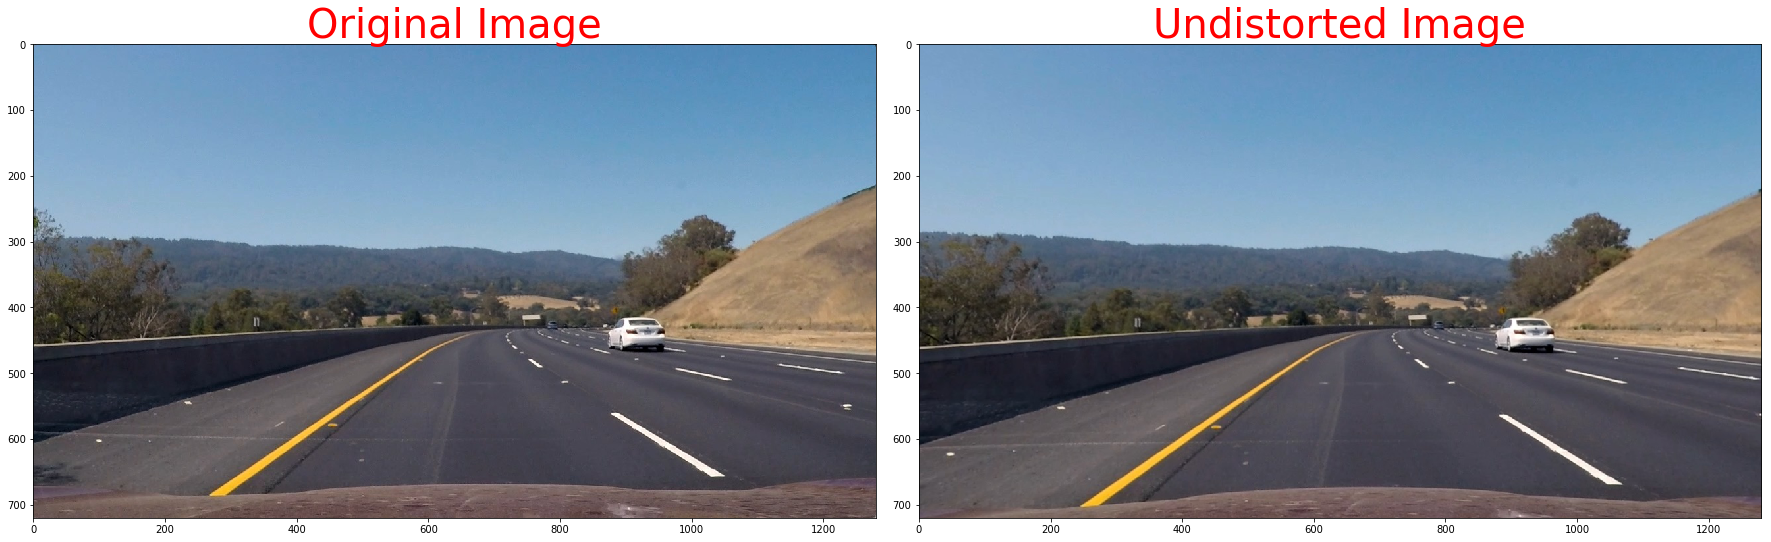

In [4]:
#straight_lines1, test1
image = mpimg.imread('./test_images/test3.jpg')

undistorted = cal_undistort(image, objpoints, imgpoints)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40, color ='r')
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=40, color ='r')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('1_Undistorted_Image.png')



---

## _B. Creating a Binary Image_


- I used a combination of color and gradient thresholds to generate a binary image.  
- In order to emphesize certain features, I attempted various combinations of adding images that capture a given behavior.  
- Also attempted some morphological processing technques to emphasize road lines
- Various parameters were insptected visually.
- An example of my output for this step is shown in the end
- The below code is self-explanatory

### B.1: Defining Related Functions
Related Functions in **_helping_fns.py_**: 

- abs_sobel_thresh(...)
- mag_thresh(...)
- dir_threshold(...)
- binary_Channel_Select(...)
- show_images(...)
- edges_piep(...)
- get_Threshold(...)






### B.2: Examinning different image combinations

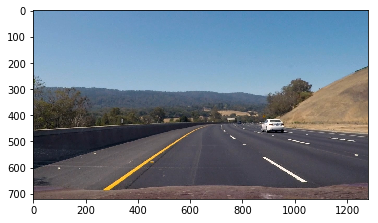

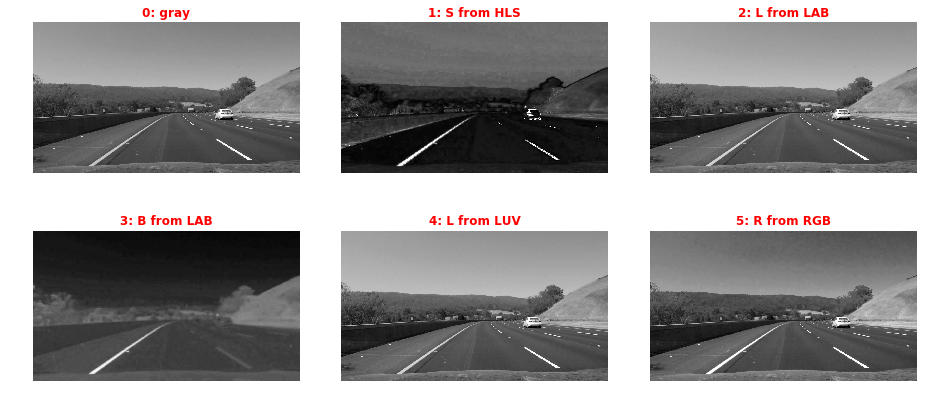

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(5,5)) # clipLimit=2.0, tileGridSize=(8,8)
equ_img = clahe.apply(gray)

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
luv = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
H_hsv = hsv[:,:,0]
S_hsv = hsv[:,:,1]
V_hsv = hsv[:,:,2]

#Examining Various color spaces

L_hls = hls[:,:,1]
S_hls = hls[:,:,2] 

L_lab = lab[:,:,0]
B_lab = lab[:,:,2] 


L_luv = luv[:,:,0]

R_rgb = image[:,:,0]
G_rgb = image[:,:,1]

all_images = np.array([gray, S_hls, L_lab, B_lab, L_luv, R_rgb])
titles = np.array(['gray', 'S from HLS', 'L from LAB', 'B from LAB','L from LUV', 'R from RGB'])

plt.imshow(image)
show_images(all_images, titles,(13,6), size = (2,3))
plt.savefig('2_Image_Channels.png')


### B.3: Examining different edges and gradients using various thresholds
I would like to acknowledge the effort of the anonymous reviewer who provided his constructive feedback on the following interactive widget to choose the best parameters. Previously, I used to adjust them in a tedious way one by one, using some educated guess. :)

Some summary notes about various image channels

- **S-channel** of HLS colorspace is good to find yellow line and in combination with gradients it can give you very good result.
- **R-channel** of RGB colorspace is pretty good to find required lines in some conditions.
- **L-channel** of LUV colorspace for white line.
- **B-channel** of LAB colorspace may be good for yellow line.
- You just need to choose good thresholds for them.

I also found this blog useful. [link](http://rodrigoberriel.com/2014/11/opencv-color-spaces-splitting-channels/)


**_I would like to acknowledge the effort of the annonymous reviewer for his detailed useful comments, structured, neat and nice feedback. The use of the following interactive visualization was suggested by him. It has eased the process a lot_**

In [6]:
def interactive_mask(low_thresh, high_thresh):
    
    examined_image = binary_Channel_Select(V_hsv, thresh=(low_thresh, high_thresh))
    
    plt.figure(figsize=(10,6))
    plt.imshow(examined_image,cmap='gray')
    plt.show()

interact(interactive_mask,low_thresh=(0,255), high_thresh=(0,255))


Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.interactive_mask>

### Extracting the binary channels according to the specified threshold

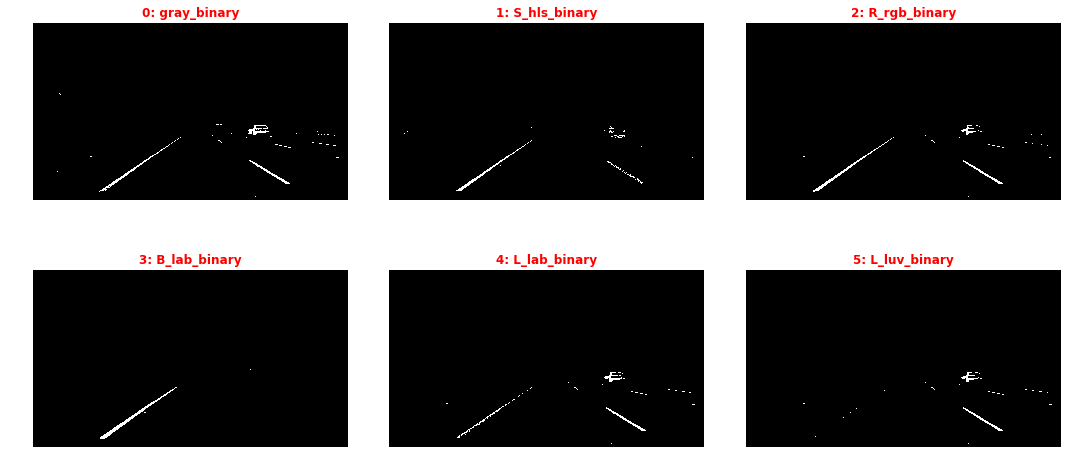

In [7]:
gray_binary = binary_Channel_Select(gray, thresh=(187, 255)) #187
S_hls_binary = binary_Channel_Select(S_hls, thresh=(191, 255)) #191
R_rgb_binary = binary_Channel_Select(R_rgb, thresh=(219, 255)) # 219
B_lab_binary = binary_Channel_Select(B_lab, thresh=(165, 255))  # [146-179] only left lane
L_lab_binary = binary_Channel_Select(L_lab, thresh=(207, 255)) #207
L_luv_binary = binary_Channel_Select(L_luv, thresh=(213, 255)) # 213

#additional
S_hsv_binary = binary_Channel_Select(S_hsv, thresh=(77, 250)) # for yellow
V_hsv_binary = binary_Channel_Select(V_hsv, thresh=(230, 250))  # for white


all_edges = np.array([gray_binary, S_hls_binary,R_rgb_binary, 
                      B_lab_binary, L_lab_binary, L_luv_binary ])

edge_labels = np.array(['gray_binary', 'S_hls_binary', 'R_rgb_binary', 
                        'B_lab_binary', 'L_lab_binary', 'L_luv_binary' ])

show_images(all_edges, edge_labels,(15,7), size = (2,3))
plt.savefig('3_Manual Thresholding.png')

### Combining features


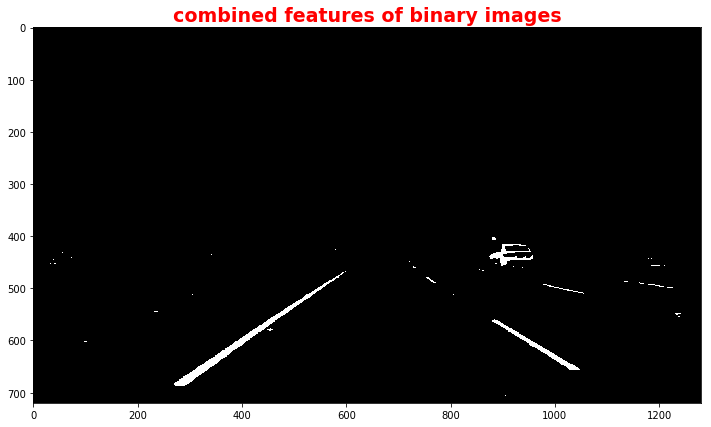

In [8]:

combined_thresh = np.zeros_like(gray_binary)

#combining images with best features by visually inspecting the previous figures

#gray_binary, S_hls_binary, R_rgb_binary, B_lab_binary, L_lab_binary, L_luv_binary 

detect_yellow =  (B_lab_binary == 1)| (S_hls_binary == 1)&(S_hsv_binary==1) 
detect_white = ((L_lab_binary == 1) & (L_luv_binary == 1))| (V_hsv_binary==1)
detect_both =  ((gray_binary == 1) & (R_rgb_binary == 1) )
#various_conditios = ((R_rgb_binary == 1)& ((G_rgb_binary == 1))& (L_hls == 1))


combined_thresh[(detect_yellow | detect_white | detect_both )] =1

kernel = np.ones((3,3),np.uint8)
combined_thresh = cv2.morphologyEx(combined_thresh, cv2.MORPH_CLOSE, kernel)

f2, main_ax = plt.subplots(figsize=(10, 9))
f2.tight_layout()
main_ax.imshow(combined_thresh, cmap = 'gray')
main_ax.set_title('combined features of binary images', fontsize=19, fontweight='bold', color = 'r')

plt.savefig('5_Image Features Based on Color Thresholding.png')

### B.4: Examining the Effect of Sobel Edge Detection
The kernel size is limited to 1, 3, 5, or 7 values only in Sobel Detector.  

{'gray': [56.0, 170.0, 3], 'L_lab': [60.0, 182.0, 7], 'S_hls': [32.0, 98.0, 5], 'B_lab': [58.0, 176.0, 5], 'R_rgb': [60.0, 182.0, 5], 'L_luv': [60.0, 182.0, 5]}


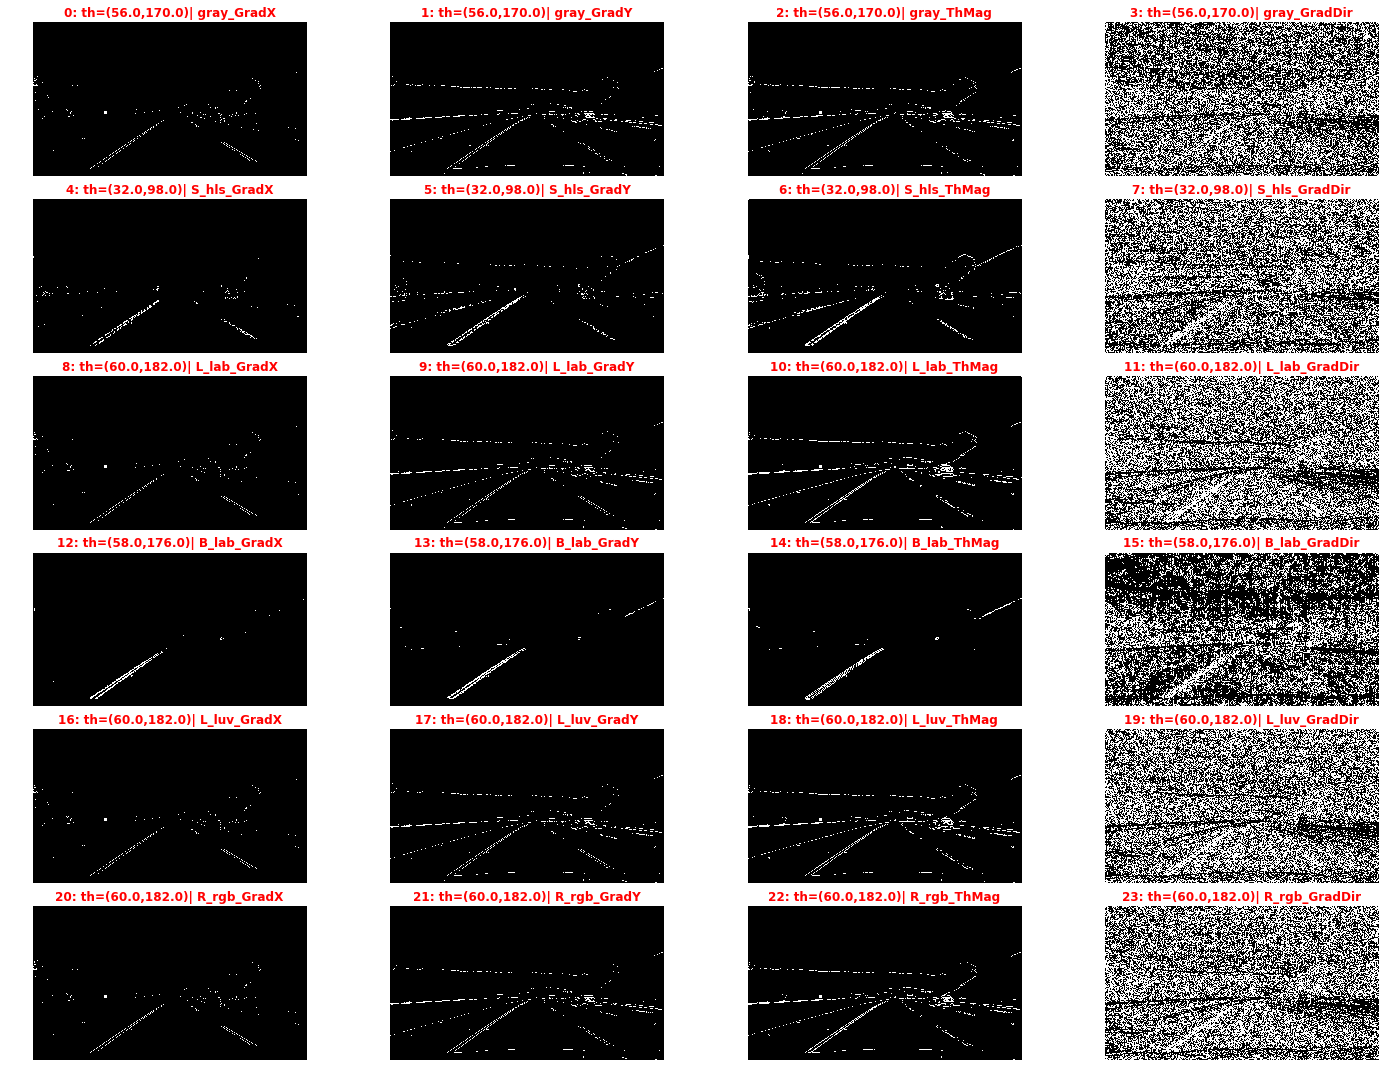

In [9]:
channels_of_concern = [gray, S_hls, L_lab, B_lab, L_luv,R_rgb ]
channels_names = ['gray', 'S_hls', 'L_lab','B_lab', 'L_luv', 'R_rgb']
labels = np.array(['_GradX','_GradY' , '_ThMag','_GradDir' ])

all_images = []
all_labels = []
parameters ={}

parameters = get_Threshold(channels_of_concern)

print(parameters)

for i in range(len(channels_names)):
    
    img_ch_name = channels_names[i]
    
    L_th = parameters[img_ch_name][0]
    H_th = parameters[img_ch_name][1]
    ksize = parameters[img_ch_name][2]
    
    grad_images = edges_pipe(channels_of_concern[i], [L_th, H_th], ksize)
    all_images.extend(grad_images)
    
    nLables = [w.replace('_','th=(' + str(L_th) + ',' + str(H_th) + ')| ' +
                         channels_names[i] + '_' ) for w in labels]
    all_labels.extend(nLables)
    
    
show_images(np.array(all_images), np.array(all_labels),(20,15), size = (6,4))
plt.savefig('4_Sobel Edges for Various Channesl.png')

### Combining Sobel Features
 

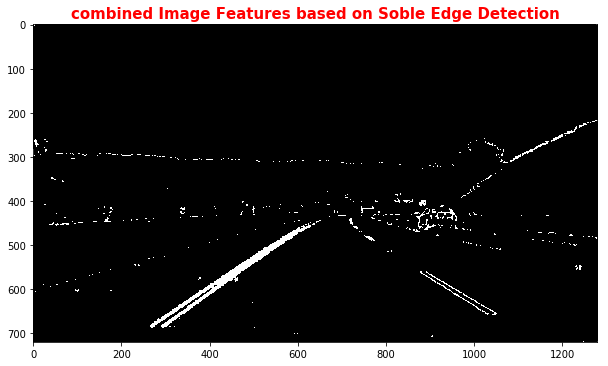

In [10]:
combine_soble = np.zeros_like(gray_binary)

#combining images with best features by visually inspecting the previous figures that shows sobel edges and gradients

x_grad_combine = (((all_images[4] == 1) & (all_images[20] == 1))| (all_images[12] == 1) )
y_grad_combine = ((all_images[5] == 1) & (all_images[13] == 1))
th_mag_combine = (((all_images[2] == 1) & (all_images[18] == 1) & (all_images[22] == 1))  | (all_images[14] == 1) )
grad_dir_combine = ((all_images[11] == 1) & (all_images[19] == 1)| (all_images[15] == 1) )

combine_soble[   
            (th_mag_combine & grad_dir_combine ) | (y_grad_combine & x_grad_combine)
        ] =1

kernel = np.ones((3,3),np.uint8)
combine_soble = cv2.morphologyEx(combine_soble, cv2.MORPH_CLOSE, kernel)

f2, main_ax = plt.subplots(figsize=(10, 5))
f2.tight_layout()
main_ax.imshow(combine_soble, cmap = 'gray')
main_ax.set_title('combined Image Features based on Soble Edge Detection', fontsize=15, fontweight='bold', color = 'r')

plt.savefig('6_Image Edges_Cobmining Soble Features.png')

### B.6: Summary & Combining Sobel Edges and Binary Channels

One can always try various combinations of the previous schemes. Edge features seem somehow noisy and time to compute. For the vedio processing, I will stick to featurs extracted from color images based on some thresholding. Nevertheless, I will present next the result of combining both edge and color features. I will also include a function for that ** get_ColorEdgeFeatures(image)** for future experiments

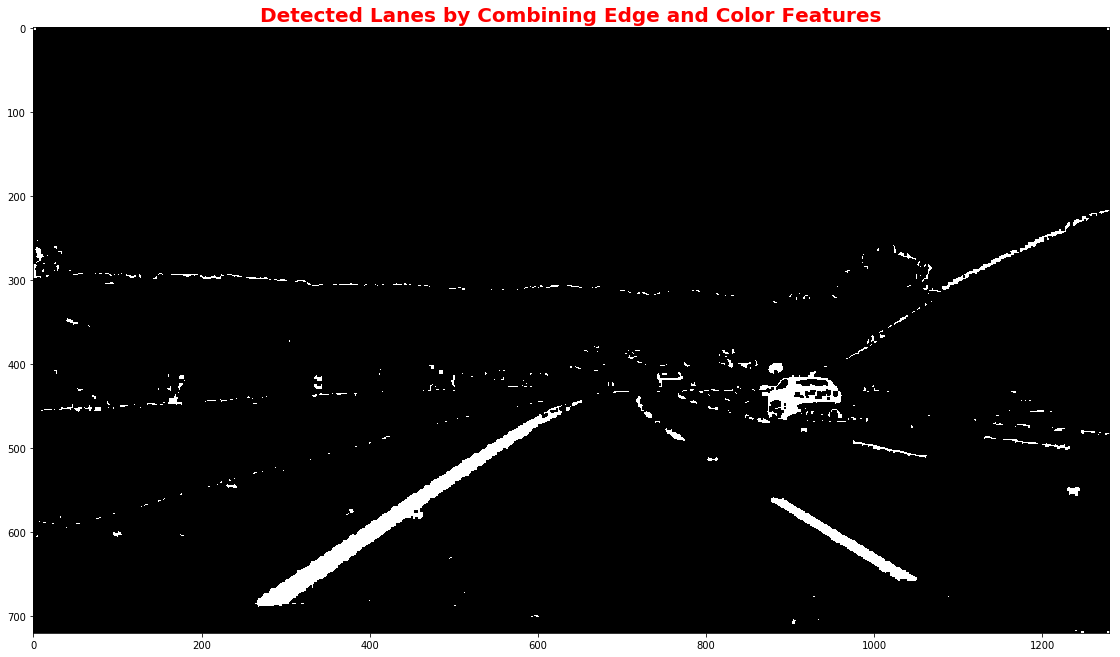

In [11]:
combined = np.zeros_like(gray_binary)

combined[   
            (combine_soble==1) | (combined_thresh ==1) 
    ] =1

kernel = np.ones((3,3),np.uint8)
combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel)

f2, main_ax = plt.subplots(figsize=(24, 9))
f2.tight_layout()
main_ax.imshow(combined, cmap = 'gray')
main_ax.set_title('Detected Lanes by Combining Edge and Color Features', fontsize=20, fontweight='bold', color = 'r')

plt.savefig('7_Combined Soble and Color.png')

---
## _C. Applying Perspective Transform_
Related Functions in **_helping_fns.py_**: 

- warp(...)
- draw_Lines(...)
---


The code for my perspective transform includes a function written below, called **warper()**. **The warper()** function takes as inputs an image ( img ), as well as source ( src ) and destination ( dst ) points. I chose the hardcode the source and destination points in the following manner:

```
    sTL = [(img_size[0] / 2) - 55, img_size[1] / 2 + 95]  #source Top Left Position
    sBL = [((img_size[0] / 6) -10), img_size[1]]          #source Bottom Left Position
    sBR = [(img_size[0] * 5 / 6) + 60, img_size[1]]        #source Bottom Right Position
    sTR = [(img_size[0] / 2 + 55), img_size[1] / 2 + 95]  #source Top Right Position

    dTL = [(img_size[0] / 4), 0]                    #destination Top Left Position
    dBL = [(img_size[0] / 4), img_size[1]]          #destination Bottom Left Position 
    dBR = [(img_size[0] * 3 / 4), img_size[1]]      #destination Bottom Right Position
    dTR = [(img_size[0] * 3 / 4), 0]                #destination Top Right Position

```
This resulted in the following source and destination points:

| Source        | Destination   | Description         | 
|:-------------:|:-------------:|:-------------------:|
| (695, 455)    | (960, 0)      | Top Left Corner     |
| (585, 455)    | (320, 0)    | Bottom Left Corner  |
| (1127, 720)   | (960, 720)    | Bottom Right Corner |
| (203, 720)    | (320, 720)      | Top Right Corner    |




I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image. Please see the figures below

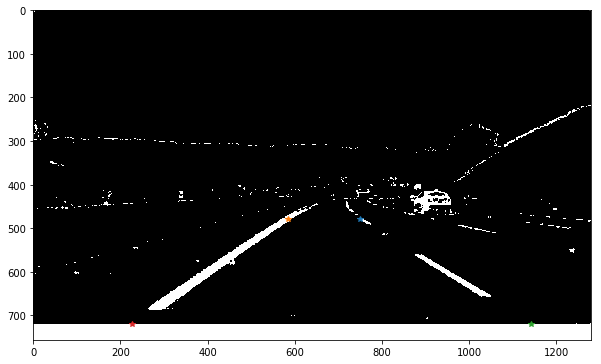

In [12]:
img_size = (img.shape[1], img.shape[0])


#Define calibration box in source (original) and destination (desired or wraped) coordinates
sTL = [(img_size[0] / 2) -55, img_size[1] / 2 +120]  #source Top Left Position
sBL = [((img_size[0] / 6) +13), img_size[1]]          #source Bottom Left Position         
sBR = [(img_size[0] * 5 / 6) +75, img_size[1]]        #source Bottom Right Position
sTR = [(img_size[0] / 2 + 110), img_size[1] / 2 +120]  #source Top Right Position

dTL = [(img_size[0] / 4), 0]                    #destination Top Left Position
dBL = [(img_size[0] / 4), img_size[1]]          #destination Bottom Left Position 
dBR = [(img_size[0] * 3 / 4), img_size[1]]      #destination Bottom Right Position
dTR = [(img_size[0] * 3 / 4), 0]                #destination Top Right Position

src = np.float32( [sTR, sTL, sBR, sBL] )
dst = np.float32( [dTR, dTL, dBR, dBL] )


fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax.imshow(combined,'gray')


ax.plot(sTR[0],sTR[1],'*') #Top right
ax.plot(sTL[0],sTL[1],'*') #Top left
ax.plot(sBR[0],sBR[1],'*') #bottom right
ax.plot(sBL[0],sBL[1],'*') #bottom left


plt.savefig('8_Source_Dst Points.png')


### Get Perspective transform

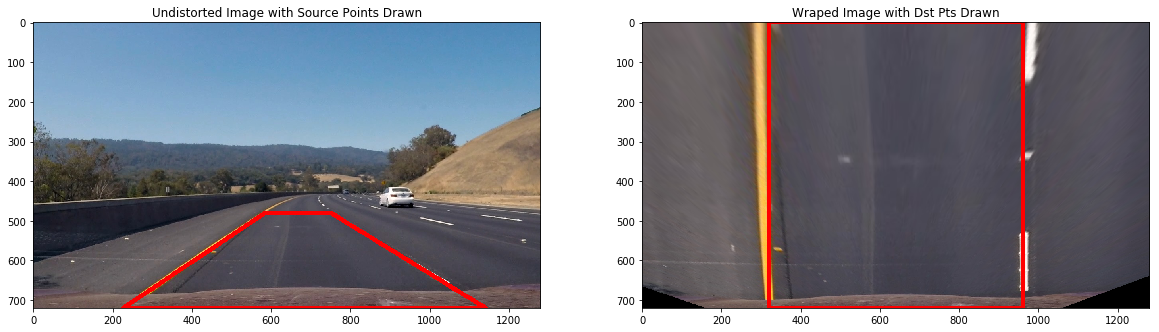

In [13]:
binary_warped = warp(combined,src, dst) 
original_warped = warp(image,src, dst)

original_Lines = draw_Lines(image,sTL,sBL, sBR, sTR,color= [255, 0, 0], thickness=10)
original_Warped_Lines = draw_Lines(original_warped,dTL,dBL, dBR, dTR,color= [255, 0, 0], thickness=10)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('Undistorted Image with Source Points Drawn')
ax1.imshow(original_Lines)
ax2.set_title('Wraped Image with Dst Pts Drawn')
ax2.imshow(original_Warped_Lines)

plt.savefig('9_Perspective_Transform.png')

---
## _D. Identifying Lane Lines_
Related Functions in **_helping_fns.py_**: 

- identify_LaneLines(...)

---

Then I did some other stuff and fit my lane lines with a 2nd order polynomial. The code is called below and plot comes after that:



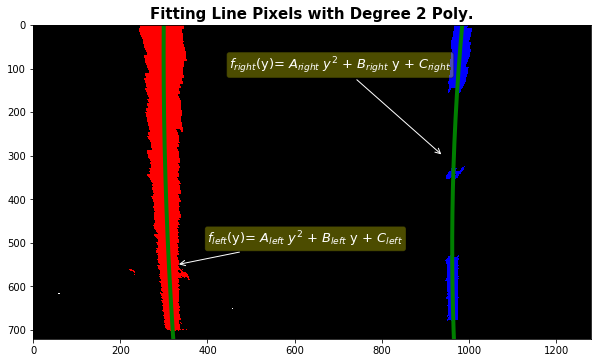

In [14]:
out_img,leftx,lefty,rightx,righty, left_fit, right_fit = identify_LaneLines(binary_warped)

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


f, ax = plt.subplots(1,1, figsize=(10,10))

ax.imshow(out_img)
ax.plot(left_fitx, ploty, linewidth=4, color='g')
ax.plot(right_fitx, ploty, linewidth=4, color='g')


ax.annotate(r'$f_{left}$(y)= $A_{left}$ $y^2$ + $B_{left}$ y + $C_{left}$', 
            xy=(330, 550), xytext=(400, 500), color='white',fontsize=13,
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='w'),
            )

ax.annotate(r'$f_{right}$(y)= $A_{right}$ $y^2$ + $B_{right}$ y + $C_{right}$',
            xy=(940, 300), xytext=(450, 100), color='white',fontsize=13,
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='w'),
            )


ax.set_xlim(0, 1280)
ax.set_ylim(720, 0)

ax.set_title('Fitting Line Pixels with Degree 2 Poly.', fontsize=15, fontweight='bold', color = 'k')

plt.savefig('10_Color_Fit_Lines.png')

---
## _E. Radius of Carvature and Position of Veihicle_

The same steps presented in the lecture as well as [here](http://www.intmath.com/applications-differentiation/8-radius-curvature.php) were utilized to find the radius of carvature. The position of the vehicle was identified with respect to center in the lane.


In [15]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)


9743.60060827 5673.06842815


### Mapping to Real Space
** So here's a way to repeat the calculation of radius of curvature after correcting for scale in x and y: **

** Assumptions**


the lane is about 30 meters long and 3.7 meters wide

In [16]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters


R_Curvature = 'Radius of Curature = {:0.2f} (m)'.format((left_curverad+right_curverad)/2)
print(left_curverad, 'm', right_curverad, 'm')



3178.93850062 m 1859.59262998 m


#### Obtaining more accurate radius is possible and requires lot of fine tunning of src and dst points

###  Position towards the center

In [17]:
#1. Assume that camera is placed at the center of the car - so image width divided on 2 is an actual car position
center = (right_fitx[img_size[1]-1] + left_fitx[img_size[1]-1])/2

center_position = abs(img_size[0]/2 - center)
center_position_m = xm_per_pix*center_position

lane_pos = 'Vehicle is {:0.2f} meter of the center'.format(center_position_m)

print(lane_pos)

Vehicle is 0.02 meter of the center


---
## _F. Putting Everything togehter: Drwaing_

Related Functions in **_helping_fns.py_**: 

- draw_Full_DetectedPath(...)

---

Here is an example of my result on a test image:




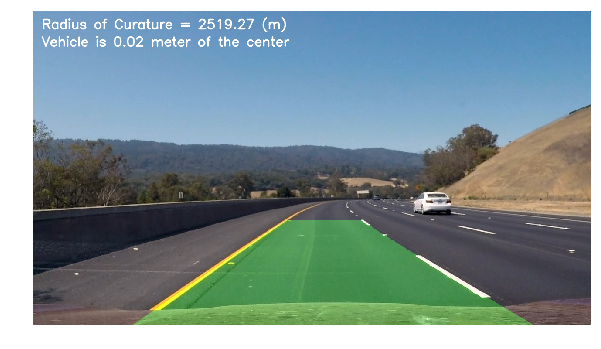

In [18]:
full_Detected_Path = draw_Full_DetectedPath(image, binary_warped,left_fit,right_fit, src,dst )

font = cv2.FONT_HERSHEY_SIMPLEX
result = cv2.putText(full_Detected_Path,R_Curvature,(20,40), font, 1, (255,255,255), 2, cv2.LINE_AA)
result = cv2.putText(full_Detected_Path, lane_pos,(20,80), font, 1, (255,255,255), 2, cv2.LINE_AA)

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.imshow(result)
ax.axis('off')

plt.savefig('11_Example_output.png')

---


# Part_3: Pipeline (Video)

The result of this section **P4_Simple.mp4** is in the same folder that contains the source file

## Notes
- I would like to acknolwdge the following resources that helped greatly fine tuning this part of the project:
    - ** Udacity Forum **: various hints related to concept and algorithms
    - ** Former Grader **: who provided valuable comments and the debugging tool
    - ** [The following online source](https://github.com/subodh-malgonde/advanced-lane-finding/blob/master/Advanced_Lane_Lines.ipynb)** for various implementation tricks and ideas
    - ** The tips from Udacity Lectures**: I will here summarise them before presenting the code
    - In order to meet the hard deadline, I had to follow some bad software engineering practices like the use of Global Variables. It is definitely not safe and the use of objects and classes provide the necessary encapsulation. This is to be done later

** The following tips help obtaining a smooth lane under various imaging conditions:**

### Sanity Check

Checking that the detected lines makes sense. To confirm that the detected lane lines are real, the following are considered:
   - Checking that they have similar curvature
   - Checking that they are separated by approximately the right distance horizontally
   - Checking that they are roughly parallel


### Look-Ahead Filter

- Once the lane lines are found in one frame of video, the following lines in consecutive frames will be easily identified by searching within a window around the previous detection.

- For example, if a polynomial was fitted, then for each y position, there exists an x position that represents the lane center from the last frame. One can then search for the new line within +/- some margin around the old line center.


### Reset

- If the sanity checks reveal that the detected lane lines are problematic for some reason, then it is safe to assume it was it was a bad or difficult frame of video.  
- One can then retain the previous positions from the frame prior and step to the next frame to search again.
- If the lines are lost for several frames in a row, a new search should be started from scratch using a histogram and sliding window, or another method, to re-establish your measurement.

### Smoothing

- To prevent the detected lines from jumping around from frame to frame, it can would be preferable to smooth over the last n frames of video so that a cleaner result is obtained. 
- Each time a new high-confidence measurement is obtained, it should be appended to the list of recent measurements.
- Afterthat, an average is taken over the n past measurements to obtain the lane position.

### Drawing

- Once a good measurement of the line positions in obtained in the warped space, they should be projected back down onto the road!

## Implementation

In [19]:
# Some global variables
polyfit_left=None
polyfit_right=None

good_Left_Lines = []
good_Right_Lines = []

lane_Moving_Avg = 0

ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )

In [20]:
def search_lines(binary_warped):
    
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image

        #cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        #cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 

        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    
    
    detected_Left_x, detected_Right_x = identify_LaneLines2(nonzerox, nonzeroy, left_lane_inds, right_lane_inds)
    
    return detected_Left_x, detected_Right_x
    
    

In [21]:
def identify_LaneLines2(nonzerox, nonzeroy, left_lane_inds, right_lane_inds):
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # If no pixels were found return None
    if(lefty.size == 0 or leftx.size == 0):
        return None, None
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    
        # If no pixels were found return None
    if(righty.size == 0 or rightx.size == 0):
        return None, None
    
    right_fit = np.polyfit(righty, rightx, 2)
    
    
    # Generate x and y values for plotting
    
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

  
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    
    return  left_fitx, right_fitx
    #return out_img,leftx,lefty,rightx,righty, left_fit, right_fit, ploty, left_fitx, right_fitx


In [22]:
def get_LaneIndx(polyfit,nonzerox, nonzeroy , margin = 100):
    
    fit_ = polyfit[0]*nonzeroy**2 + polyfit[1]*nonzeroy + polyfit[2]
    fitted_inds = ((nonzerox >= fit_ - margin) & (nonzerox <= fit_ + margin)).nonzero()[0]
    
    return fitted_inds


In [23]:
def get_Bad_Lines_Heuristic(detected_Left_x, detected_Right_x, g_mv_Avg):
    
    # Smooting Strategy: 
    # The following is a global variable to store the moving average of the mean difference between left and right lanes
    
    local_mv_Avg = g_mv_Avg
    
    #setting some heuristics for the range of accepted Good Line
    between_Lanes_Avg_Distance = np.mean(detected_Right_x - detected_Left_x)
    
    
    if local_mv_Avg == 0:
       
        local_mv_Avg = between_Lanes_Avg_Distance
    
    
    #------------------------------------------
    Bad_Line_Range = between_Lanes_Avg_Distance < 0.7 * local_mv_Avg 
    
    #------------------------------------------
    
    return Bad_Line_Range, local_mv_Avg


def detect_BadLines(detected_Left_x, detected_Right_x, searched, g_mv_Avg ):
    
    #It would be definitly more readable if Swich Case was supported in Python
    Bad_Line_Range,_ = get_Bad_Lines_Heuristic(detected_Left_x, detected_Right_x, g_mv_Avg)
    bad_lines_Status = False
    
    #Neither Lane was detected:
    if (detected_Left_x is None or detected_Right_x is None):
        bad_lines_Status = True
        
    else:
    
    #Lane lines are detected, check if they fit in a suitable range withen the average detecetd so far
  
        if (Bad_Line_Range):
            bad_lines_Status = True
            
            if not searched:
                #give it another shot and search if it was not already.
                detected_Left_x, detected_Right_x = search_lines(warped_binary)
                
                if (detected_Left_x is None or detected_Right_x is None):
                    bad_lines_Status = True
                
                else:
                    
                    Bad_Line_Range,_ = get_Bad_Lines_Heuristic(detected_Left_x, detected_Right_x,g_mv_Avg )
                    
                    if (Bad_Line_Range):
                        bad_lines_Status = True
                    else:
                        bad_lines_Status = False
        
        else:
            bad_lines_Status = False
    
    return bad_lines_Status


In [24]:
def get_curvature(x_values):
    
    ym_per_pix = 30/720 
    xm_per_pix = 3.7/700 
    
    y_points = ploty
    y_eval = np.max(ploty)

    # Fit new polynomials to x,y in world space
    fit_cr = np.polyfit(y_points*ym_per_pix, x_values*xm_per_pix, 2)
    curverad = ((1 + (2*fit_cr[0]*y_eval*ym_per_pix + fit_cr[1])**2)**1.5) / np.absolute(2*fit_cr[0])
    return curverad

In [25]:
def get_averaged_line(previous_lines, new_line):
    """
        This function computes an averaged lane line by averaging over previous good frames.
        It was utilized from the above mentioned source as is.
    """
    
    # Number of frames to average over
    num_frames = 20
    
    if new_line is None:
        # No line was detected
        
        if len(previous_lines) == 0:
            # If there are no previous lines, return None
            return previous_lines, None
        else:
            # Else return the last line
            return previous_lines, previous_lines[-1]
    else:
        if len(previous_lines) < num_frames:
            # we need at least num_frames frames to average over
            previous_lines.append(new_line)
            return previous_lines, new_line
        else:
            # average over the last num_frames frames
            previous_lines[0:num_frames-1] = previous_lines[1:]
            previous_lines[num_frames-1] = new_line
            new_line = np.zeros_like(new_line)
            for i in range(num_frames):
                new_line += previous_lines[i]
            new_line /= num_frames
            return previous_lines, new_line

In [26]:
# The following function Pipeline the above steps and is used later in vedio processing
def get_binaryImageFeatures(image):

    #Extract Features from color images after applying a threshold
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(5,5)) # clipLimit=2.0, tileGridSize=(8,8)
    equ_img = clahe.apply(gray)

    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    luv = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    H_hsv = hsv[:,:,0]
    S_hsv = hsv[:,:,1]
    V_hsv = hsv[:,:,2]

    #Examining Various color spaces

    L_hls = hls[:,:,1]
    S_hls = hls[:,:,2] 

    L_lab = lab[:,:,0]
    B_lab = lab[:,:,2] 


    L_luv = luv[:,:,0]

    R_rgb = image[:,:,0]
    G_rgb = image[:,:,1]

    gray_binary = binary_Channel_Select(gray, thresh=(187, 255)) #187
    S_hls_binary = binary_Channel_Select(S_hls, thresh=(191, 255)) #191
    R_rgb_binary = binary_Channel_Select(R_rgb, thresh=(219, 255)) # 219
    B_lab_binary = binary_Channel_Select(B_lab, thresh=(165, 255))  # [146-179] only left lane
    L_lab_binary = binary_Channel_Select(L_lab, thresh=(207, 255)) #207
    L_luv_binary = binary_Channel_Select(L_luv, thresh=(213, 255)) # 213

    #additional
    S_hsv_binary = binary_Channel_Select(S_hsv, thresh=(77, 250)) # for yellow
    V_hsv_binary = binary_Channel_Select(V_hsv, thresh=(230, 250))  # for white

    detect_yellow =  (B_lab_binary == 1)| (S_hls_binary == 1)&(S_hsv_binary==1) 
    detect_white = ((L_lab_binary == 1) & (L_luv_binary == 1))| (V_hsv_binary==1)
    detect_both =  ((gray_binary == 1) & (R_rgb_binary == 1) )
    combined_thresh = np.zeros_like(gray_binary)

    #combining images with best features by visually inspecting the previous figures
    combined_thresh[(detect_yellow | detect_white | detect_both )] =1

   
    kernel = np.ones((3,3),np.uint8)
    combined_thresh = cv2.morphologyEx(combined_thresh, cv2.MORPH_CLOSE, kernel)
    
    return combined_thresh

In [27]:
def draw_Full_DetectedPath2(image, binary_warped,left_fitx,right_fitx, src,dst,R_Curvature, lane_pos  ):
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    #left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    #right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    Minv = cv2.getPerspectiveTransform(dst, src) #inverse perspective transform

    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    
    result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    cv2.putText(result,R_Curvature , (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    cv2.putText(result, lane_pos, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    
    
    
    return result

In [28]:
def handle_images(my_image):
    # global variables to store the polynomial coefficients of the line detected in the last frame
    
    global polyfit_right
    global polyfit_left
  
    global good_Right_Lines
    global good_Left_Lines
    
    global lane_Moving_Avg
    #----------------------------------------------
    
    img_size = (my_image.shape[1], my_image.shape[0])
    
    
    #undistorted = cal_undistort(image, objpoints, imgpoints) Did not had that effect
    # get thresholded image
    binary_combined = get_binaryImageFeatures(my_image)
    
    # perform a perspective transform
    warped_binary = warp(binary_combined,src, dst) 
    
    # Create an output image to draw on and  visualize the result
    #out_img = np.dstack((warped_binary, warped_binary, warped_binary))*255
    
     
    non_zeros = warped_binary.nonzero()
    nonzeroy = non_zeros[0]
    nonzerox = non_zeros[1]
    
  
    #---------------------------------------------------
    # Perform a complete search in case  now coefficients were found
    if (polyfit_left is None) or (polyfit_right is None):
        
        searched = True
        detected_Left_x, detected_Right_x = search_lines(warped_binary)
        
    
    else:
    # Else search in a margin of 100 pixels on each side of the pervious polynomial fit
        
        searched = False
        margin = 50
        
        left_lane_inds = get_LaneIndx(polyfit_left[0],nonzerox, nonzeroy , margin)
        right_lane_inds = get_LaneIndx(polyfit_right[0],nonzerox, nonzeroy , margin)

        detected_Left_x, detected_Right_x = identify_LaneLines(nonzerox, nonzeroy, left_lane_inds,right_lane_inds) 
        
       
    #---------------------------------------------------   
    """
    Enhancement Strategy: Perfomring a Reset
    Lines were searched but nothing useful was found, then mark this search as bad
    """
    
    #To be in the safe side, search again
    if (detected_Left_x is None or detected_Right_x is None):
        
        if not searched:
            detected_Left_x, detected_Right_x = search_lines(warped_binary)
            
    #--------------------------------------------------- 
    """
    Enhancement Strategy: Smoothing 
    Detecting Bad Lines and calling a moving average over past good detected lines
    """
    
    
    bad_lines = detect_BadLines(detected_Left_x, detected_Right_x, searched, lane_Moving_Avg)
    
    if bad_lines:
        polyfit_left = None
        polyfit_right = None
        
        
        if len(good_Left_Lines) == 0 and len(good_Right_Lines) == 0:
            
            
            return my_image
        
        else:
            #rolling one step back
            
            detected_Left_x = good_Left_Lines[-1]
            detected_Right_x = good_Right_Lines[-1]
    
    else:
        #consider an average of previous good lines
        
        good_Left_Lines, detected_Left_x = get_averaged_line(good_Left_Lines, detected_Left_x)
        good_Right_Lines, detected_Right_x = get_averaged_line(good_Right_Lines, detected_Right_x)
        
        #update moving average
        
        mean_difference = np.mean(detected_Right_x - detected_Left_x)
        
        #update the value based on new added data
        alpha = 0.85
        lane_Moving_Avg = alpha*lane_Moving_Avg + (1-alpha)*mean_difference
        
     
    #print("moving average", lane_Moving_Avg)
    #----------------------------------------
    
    # compute the radius of curvature
    left_curverad = get_curvature(detected_Left_x)
    right_curverad = get_curvature(detected_Right_x)
    R_Curvature = 'Radius of Curature = {:0.2f} (m)'.format((left_curverad+right_curverad)/2)
    
    
    # compute the offset from the center
    center = (detected_Right_x[img_size[1]-1] + detected_Left_x[img_size[1]-1])/2
    xm_per_pix = 3.7/700 
    center_position = abs(img_size[0]/2 - center)
    center_position_m = xm_per_pix*center_position
    lane_pos = 'Vehicle is {:0.2f} meter of the center'.format(center_position_m)
    
    
    result = draw_Full_DetectedPath2(my_image, warped_binary,detected_Left_x,detected_Right_x, src,dst,
                                    R_Curvature, lane_pos  )
    
    
    return result

In [29]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [30]:
P4_Simple = 'P4_newTrail.mp4'
clip = VideoFileClip("project_video.mp4")#.subclip(1,10)  project_video


processed_Simple = clip.fl_image(handle_images) #NOTE: this function expects color images!!
%time processed_Simple.write_videofile(P4_Simple, audio=False )


MoviePy: building video file P4_newTrail.mp4
----------------------------------------

Writing video into P4_newTrail.mp4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1210/1210 [02:32<00:00,  7.38it/s]


Done writing video in P4_newTrail.mp4 !
Your video is ready !
Wall time: 2min 33s


In [31]:
dsdfds

NameError: name 'dsdfds' is not defined

---


---
# Discussion

**Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?**

- Choosing both src & dst points that are used in the perspective transform is very delicate and makes huge difference when approximating the curvature. The above implementation may fail with steep curves where special adaptive techniques are needed to locate those points.
- I also had some difficulties in deciding upon an accurate merge of different edges. What might work for a given image might not simply work for another. For that reason, a preprocessing step should be done a prioi in order to mitigate such differences. These include applying a low pass filter to smooth the image
- I also have not explored the optimization used in sliding window. This a long with the challenging vedios are the subject of some future improvements
- Trying the implementation on the challenging vedio produced in some frames some funny results. The images there contain lot of texture and noise. Some preprocessing is mandatory for correct identification. Also some statistical methods may be utilized to predict some variations.
- In the extreemly challenging vedio, there was this very steep turn where other cars pass by. I currently have no clue how to deal with that issue, but it is a very good challenge where different ideas may be tried.

# Current Limitations and Weaknesses
- Excessive use of global variables 
- At the end of the vedio, the detected lane slides a little to the right. 


# Utility Function that helps in debugging

In [ ]:
# Process pipeline with aditional information
def process_image_ex(image):
    undist = # function that returns undistorted image
    img_binary, img_stack = # funcation that returns binary image (img_binary) and image with combination of all thresholds images (img_stack) - it will be displayed near process frame later
    warped, Minv = # function that returns birds-eye view
    lanes, ploty, left_fitx, right_fitx, left_curverad, right_curverad, center_dist = # function that detects lines and lane
    output = # function that warp image back to perspective view

    output1 = cv2.resize(img_stack,(640, 360), interpolation = cv2.INTER_AREA)
    output2 = cv2.resize(lanes,(640, 360), interpolation = cv2.INTER_AREA)

    # Create an array big enough to hold both images next to each other.
    vis = np.zeros((720, 1280+640, 3))

    # Copy both images into the composed image.
    vis[:720, :1280,:] = output
    vis[:360, 1280:1920,:] = output1
    vis[360:720, 1280:1920,:] = output2

    return vis